# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [228]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [229]:
df_obesity = pd.read_csv("Datasets/obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [230]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


In [231]:
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [232]:
df_obesity = df_obesity.set_index('Unnamed: 0')

In [233]:
df_obesity['Obesity (%)'].str.split(' ', n=1, expand=True)

,0,1
Unnamed: 0,,
0,0.5,[0.2-1.1]
1,0.2,[0.0-0.6]
2,0.8,[0.2-2.0]
3,0.5,[0.2-1.1]
4,0.2,[0.0-0.7]
...,...,...
24565,4.5,[2.4-7.6]
24566,24.8,[18.9-31.3]
24567,15.5,[12.0-19.2]


In [234]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].str.split(' ', n=1, expand=True)[0]

In [235]:
df_obesity['Obesity']

Unnamed: 0
0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [236]:
#Dados "No" separado quando eu fiz o split no "No data"
df_obesity.iloc[20800]

Country          Sudan
Year              1978
Obesity (%)    No data
Sex               Male
Obesity             No
Name: 20800, dtype: object

In [237]:
#Usando o método replace() para substituir o "No" por valores nulo
df_obesity['Obesity'] = df_obesity['Obesity'].replace(to_replace='No', value=np.NaN)

In [238]:
df_obesity.iloc[20800]

Country          Sudan
Year              1978
Obesity (%)    No data
Sex               Male
Obesity            NaN
Name: 20800, dtype: object

In [239]:
df_obesity['Obesity'].isnull().sum()

504

In [240]:
#usando a função de dataframe df.astype para definir a coluno como float
df_obesity['Obesity'] = df_obesity['Obesity'].astype(float)

In [241]:
#Apagando as linhas cujo os valores são nulos
df_obesity = df_obesity.dropna()

In [242]:
df_obesity['Obesity'].isnull().sum()

0

In [243]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Year         24066 non-null  int64  
 2   Obesity (%)  24066 non-null  object 
 3   Sex          24066 non-null  object 
 4   Obesity      24066 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [274]:
perc_med_male_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Male")]['Obesity'].mean()

In [275]:
perc_med_female_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Female")]['Obesity'].mean()

In [276]:
perc_med_male_2015

15.980628272251304

In [277]:
perc_med_female_2015

22.899476439790575

In [253]:
df_obesity['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [258]:
df_obesity['Country'].nunique()

191

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [336]:
df_obesity[df_obesity['Year'] == 2015]['Obesity'].max()

63.1

In [335]:
df_obesity[df_obesity['Year'] == 2015]['Obesity'].min()

1.5

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [296]:
id_pais_maior_obesidade = df_obesity[(df_obesity['Year'] == 2014) & (df_obesity['Sex'] == 'Both sexes')]['Obesity'].idxmax()
df_obesity.loc[id_pais_maior_obesidade]['Country']

'Nauru'

In [297]:
id_pais_menor_obesidade = df_obesity[(df_obesity['Year'] == 2014) & (df_obesity['Sex'] == 'Both sexes')]['Obesity'].idxmin()
df_obesity.loc[id_pais_menor_obesidade]['Country']

'Viet Nam'

- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [334]:
#df_obesity['Country'].unique()

In [307]:
female_obesity_years = df_obesity[(df_obesity['Sex'] == 'Female') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year')

In [315]:
male_obesity_years = df_obesity[(df_obesity['Sex'] == 'Male') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year')

In [321]:
female_obesity_years.mean()

Obesity    15.85
dtype: float64

In [322]:
male_obesity_years.mean()

Obesity    9.671429
dtype: float64

In [320]:
(female_obesity_years - male_obesity_years).mean()

Obesity    6.178571
dtype: float64

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<AxesSubplot:xlabel='Year'>

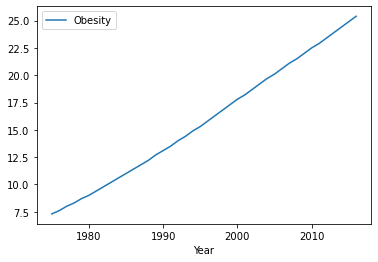

In [333]:
df_obesity[(df_obesity['Sex'] == 'Female') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year').plot()

<AxesSubplot:xlabel='Year'>

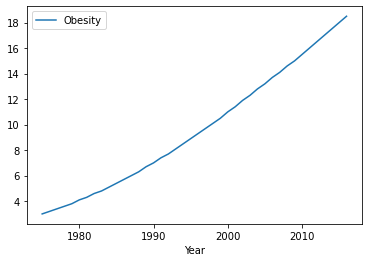

In [331]:
df_obesity[(df_obesity['Sex'] == 'Male') & (df_obesity['Country'] == 'Brazil')][['Obesity','Year']].set_index('Year').plot()

## Perguntas - GDP Per Person (1901-2011)

In [ ]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

- Você conseguiria informar o primeiro valor registrado de cada país?

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?